In [39]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler    

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline    

<h3> For 1 i/p and 1 o/p data :-</h3>

In [2]:
X = 6 * np.random.rand(200, 1) - 3    

y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2   

                ## Steps for the above code are ##
#  np.random.rand(200, 1) → creates 200 random numbers between 0 and 1 (as a column vector).
#  Multiply by 6 → now numbers are between 0 and 6.
#  Subtract 3 → shifts the range to between -3 and 3.
#  So finally, X contains 200 random numbers in the range [-3, 3].
# this is our input feature. 
# Then, calculate y using a quadratic equation (0.8x² + 0.9x + 2) and add some noise to make it look real
# we add some points in the last so that points thoda upr-niche ho 

In [3]:
# Now, Mere 'linear_model' ka kaam hai ye coefficient nikalna (i.e., x^2 ,x k saath wala term and intercept term)
# yesb hmko find krna hai

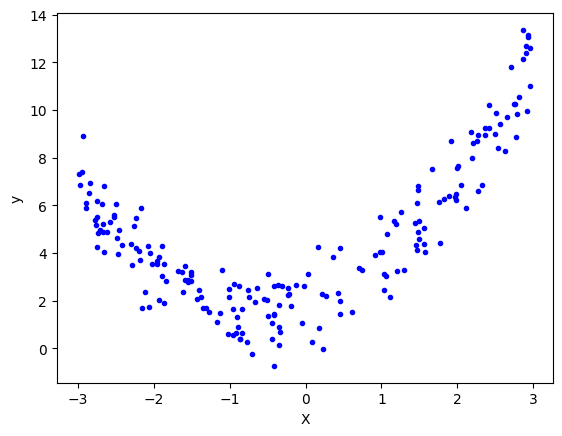

In [4]:
# so, our data are looking something like this-

plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# 'b.' → formatting string:
# 'b' = blue color.
# '.' = plot points as dots, not a line.
#  So,this plots a blue scatter of dots showing (X, y) pairs.

In [5]:
# call the 'train_test_split' model 

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [6]:
# first, we apply here for Simple_LR

lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = lr.predict(X_test)

print("R2_score:", r2_score(y_test, y_pred))

R2_score: 0.2566180601152672


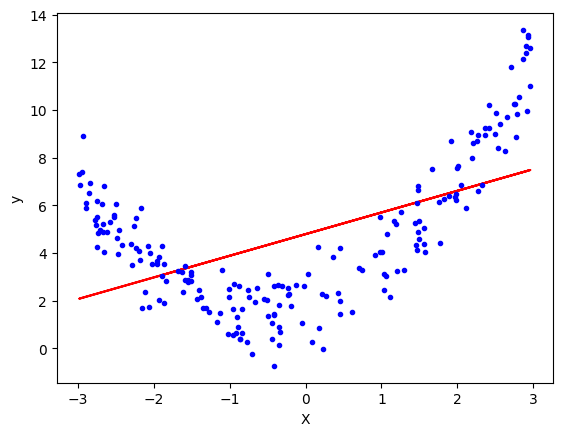

In [9]:
# reason for the less 'R2_score', visualize the graph 

plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [10]:
# so,we can see clearly that iss 'non-linear_curve' k liye,yeh line bilkul bhi perfect nhi hai 

# so now, we are trying to apply "PolynomialRegression"
# means first we are trying totransform our features using 'Polynomial_Features' class

In [11]:
# degree 2   --> so, agr hm degree '2' denge, then for every row,there, we will get 3 columns 
# means if we have i/p column is 'X' then,our o/p will be (x^0, x^1 and x^2).

poly = PolynomialFeatures(degree=2, include_bias=True)

# we use "Polynomial_Features" only on an 'i/p column' (i.e., 'X'), not on 'output column' (i.e., 'y')
# keep in mind that we have to transform both ('X_train' and 'X_test') 

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [12]:
print(X_train[0])           # it is 'X'
print(X_train_trans[0])     # it is ( X^0, X^1, X^2)

[-1.88798389]
[ 1.         -1.88798389  3.56448317]


In [13]:
# "include_bias=False" --> it removes the intercept_term (i.e., X^0 wala term) and shows only (X^1 and X^2) wala term  

In [14]:
# Now, again train your model (after using transformation) 

lr = LinearRegression()
lr.fit(X_train_trans, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = lr.predict(X_test_trans)

print("R2_score:", r2_score(y_test, y_pred))

# so, we get suddenly a big improvement in our model after transformation

R2_score: 0.8826474888906213


In [16]:
# now, find the coefficients

print(lr.intercept_)        # it gives an intercept term
print(lr.coef_)             # so, it gives the coefficient of (X^0,X^1, and X^2)

# so,these coefficients and intercept terms are approximately same as that of our real equation (0.8*X^2  +  0.9*X  +  2) 
# it doesn't come perfect bcz we add some random noise in 'y'(real_eqn) and bcz of noise, it is not possible to get original coefficients

[1.85585043]
[[0.         0.94685644 0.86648163]]


In [17]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)  
y_new = lr.predict(X_new_poly)      

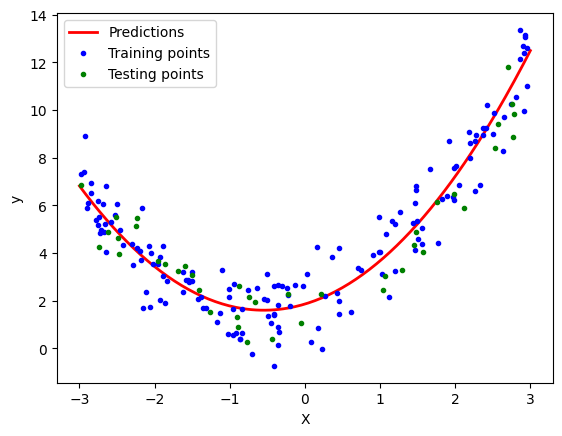

In [18]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# so this curve is very close to our actual equation.      

In [19]:
# Now, question is that:- what happened if I increase our degree i.e.,(greater than 2) 

# so, we have a function which takes a degree as an i/p and plot athe graph as an o/p 

In [20]:
def polynomial_regression(degree):
    
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

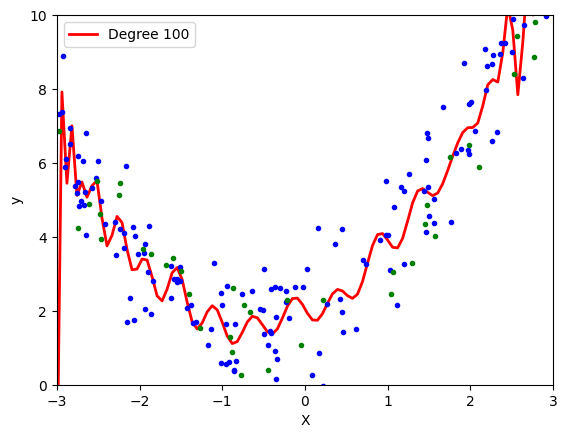

In [21]:
polynomial_regression(100)

# On increasing it's values, yeh apne true essence se thoda dur bhaag rha hai and 'training_wale_points' ko as it is pkdne ka try kr rha hai. 
# so, yeh data ke pattern ko rtne ki kosis kr rha hai rather than going for the true esscence of the data. 
# And, we called this term as "Overfitting".  --> (jo ki bilukl bhi shi nhi hai)      

In [22]:
# so, we have to make sure that whenever we apply "PolynomialTransform", toh shi degree pe aake ruk jana hai....

# if degree is too much less, then it is the case of "Underfitting"
# if degree is too much high, then it is the case of "Overfitting"

<h3> For 2 i/p and 1 o/p data :- </h3>

In [23]:
# 3-D polynomial regression :- 

x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2

# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [24]:
pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [25]:
import plotly.io as pio

# Option 1: show inside Jupyter notebook
pio.renderers.default = "notebook_connected"    

# Option 2: open plots in your browser (good if WebGL fails inside notebook)
#pio.renderers.default = "browser"      

In [26]:
import plotly.express as px
df = px.data.iris() 
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())     
fig.show()                   

In [27]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)
    
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [28]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [29]:
#So, maine jaise hi 'linear_regression' apply kiya,  but we didn't get a good result 
# bcz data mein essentialy non-linearity hai and we can't justify it by linear surface
# kyuki bhut saare points ke liye, our errors will be too high and this shows it's not fair

In [30]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape     

(100, 2)

In [31]:
# Now, we are going to apply 'Polynomial_Features' and start with degree=2

In [32]:
poly = PolynomialFeatures(degree=2) 
X_multi_trans = poly.fit_transform(X_multi)     

In [33]:
print("Input:", poly.n_features_in_)         # means hm kitne i/p features pe kaam kr rhe hai (i.e., 2)                    
print("Output:", poly.n_output_features_)    # aur unse kitne o/p bne (i.e., 6) in our case                                  
print("Powers:\n", poly.powers_)             # shows the exponents for each output feature.     

# so, output mein ('x' ka term, 'y' ka term) diya hua hai.  
# it means, if your output in the form of :-
# [0 2] -> means you have to take (term of 'x' with exponent=0(constant term), term of 'y' with exponent=2)
# [1 1] -> means you have to take (term of 'x' with exponent=1, term of 'y' with exponent=1)

# and, since we put (degree=2), so it never goes beyond to '2' (i.e., it never be [2 1], [2 2], etc...)
# you can got maxm only upto '2' 

# so, these are the only '6' coefficients

Input: 2
Output: 6
Powers:
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [34]:
X_multi_trans.shape

(100, 6)

In [35]:
# Apply linear regression again

lr = LinearRegression()
lr.fit(X_multi_trans,z)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
X_test_multi = poly.transform(final)

In [37]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [38]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()  

# check it by putting different degree 